# Damped-Local-Trend(DLT) Example

In [14]:
import pandas as pd
import numpy as np
from orbit.dlt import LGT, DLT
from orbit.utils.utils import plot_predicted_data

## Data

In [15]:
DATA_FILE = "./data/iclaims.example.csv"

In [16]:
raw_df = pd.read_csv(DATA_FILE, parse_dates=['week'])

In [17]:
raw_df.dtypes

week              datetime64[ns]
claims                     int64
trend.unemploy           float64
trend.filling            float64
trend.job                float64
dtype: object

In [18]:
raw_df.head(5)

,week,claims,trend.unemploy,trend.filling,trend.job
0,2010-01-03,651215,1.183973,0.720140,1.119669
1,2010-01-10,825891,1.183973,0.814896,1.178599
2,2010-01-17,659173,1.203382,0.739091,1.119669
3,2010-01-24,507651,1.164564,0.814896,1.107883
4,2010-01-31,538617,1.086926,0.776993,1.072525


### Data Transformation

In [19]:
df=raw_df.copy()
df.head(5)

,week,claims,trend.unemploy,trend.filling,trend.job
0,2010-01-03,651215,1.183973,0.720140,1.119669
1,2010-01-10,825891,1.183973,0.814896,1.178599
2,2010-01-17,659173,1.203382,0.739091,1.119669
3,2010-01-24,507651,1.164564,0.814896,1.107883
4,2010-01-31,538617,1.086926,0.776993,1.072525


### Train / Test Split

In [20]:
test_size=52
train_df=df[:-test_size]

# in uTS we make assertion that test dates need to be between train start/end
test_df=df[-test_size:]

## MAP Fit and Predict

In [21]:
dlt_map=DLT(
    response_col='claims',
    date_col='week',
    seasonality=52,
    seed=8888,
    predict_method='map'
)

In [22]:
dlt_map.fit(df=train_df)

In [23]:
dlt_map.aggregated_posteriors

{'mean': None,
 'median': None,
 'map': {'l': array([[13.85222853, 13.85209926, 13.85379784, 13.85247137, 13.8553378 ,
          13.85765064, 13.8594139 , 13.86263907, 13.86648369, 13.86623778,
          13.86737587, 13.86772256, 13.86740392, 13.86841494, 13.86828939,
          13.86602925, 13.86360968, 13.86243267, 13.86036874, 13.86091892,
          13.85965319, 13.85847291, 13.85747555, 13.85737258, 13.85602536,
          13.85592243, 13.85713127, 13.85697564, 13.85610578, 13.85798557,
          13.86189997, 13.86569586, 13.86713826, 13.86607417, 13.86536654,
          13.86341462, 13.85920055, 13.85715282, 13.85730601, 13.85694957,
          13.85689712, 13.85350329, 13.85074546, 13.8502819 , 13.84964193,
          13.84806053, 13.84491444, 13.84289682, 13.84231055, 13.84115405,
          13.84181347, 13.83837755, 13.83966752, 13.84759501, 13.83993967,
          13.850425  , 13.84741583, 13.84450722, 13.84514156, 13.83901878,
          13.81998775, 13.82418261, 13.82322647, 13.8239

In [24]:
predicted_df = dlt_map.predict(df=test_df)

In [25]:
predicted_df.head(5)

,week,prediction
0,2017-07-02,248879.437454
1,2017-07-09,280608.402696
2,2017-07-16,238350.328080
3,2017-07-23,205920.909455
4,2017-07-30,196571.955714


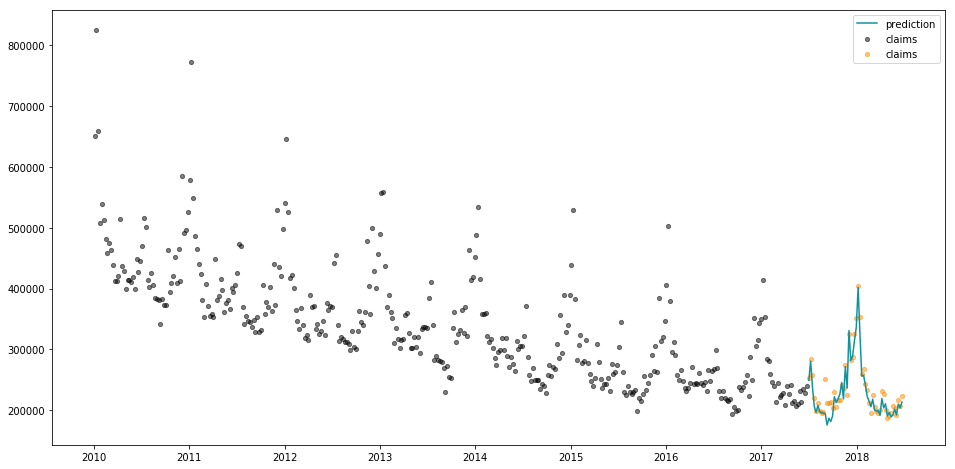

In [26]:
plot_predicted_data(training_actual_df=train_df, predicted_df=predicted_df, 
                    date_col=dlt_map.date_col, actual_col=dlt_map.response_col, pred_col='prediction', 
                    test_actual_df=test_df)

## MCMC Fit and Predict

In [27]:
dlt_mcmc = DLT(
    response_col='claims',
    date_col='week',
    seasonality=52,
    num_warmup=4000, 
    num_sample=500,
    sample_method='mcmc',
    predict_method='full',
    n_bootstrap_draws=500
)

In [28]:
dlt_mcmc.fit(df=train_df)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [29]:
predicted_df = dlt_mcmc.predict(df=test_df)

In [30]:
predicted_df.tail(5)

,week,5,50,95
47,2018-05-27,181428.644292,205188.260346,232146.072008
48,2018-06-03,168172.131701,193973.406559,218270.487823
49,2018-06-10,187650.918216,211308.280049,240132.906742
50,2018-06-17,184116.895941,204944.962827,233483.276500
51,2018-06-24,189504.074977,215007.200665,243881.077298


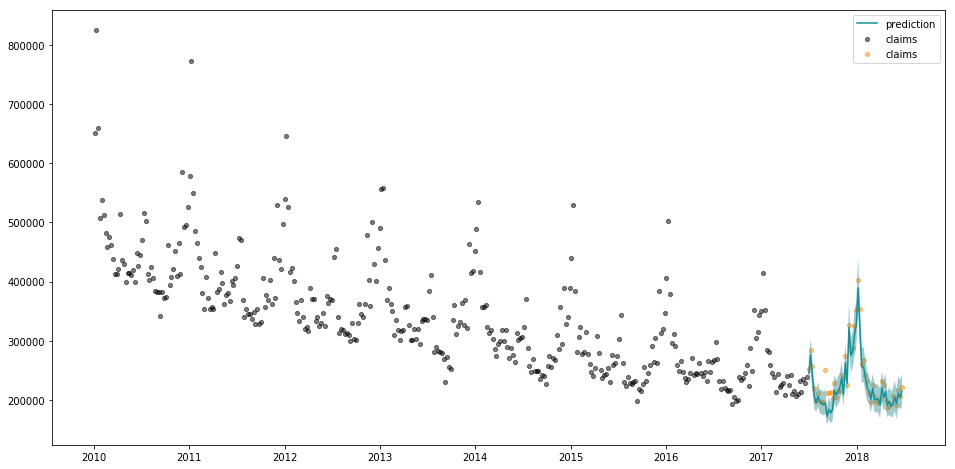

In [31]:
plot_predicted_data(training_actual_df=train_df, predicted_df=predicted_df, 
                    date_col=dlt_mcmc.date_col, actual_col=dlt_mcmc.response_col, pred_col=50, 
                    pred_quantiles_col=[5,95], test_actual_df=test_df)

## Mean Fit and Predict Decomp

In [32]:
dlt_mean=DLT(
    response_col='claims',
    date_col='week',
    seasonality=52,
    seed=8888,
    predict_method='mean'
)

In [33]:
dlt_mean.fit(df=train_df)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [34]:
predicted_df = dlt_mean.predict(df=test_df, decompose=True)

In [35]:
predicted_df.head(5)

,week,prediction,trend,seasonality,regression
0,2017-07-02,246076.966409,231833.733410,1.061437,1.0
1,2017-07-09,276330.017367,231393.742078,1.194198,1.0
2,2017-07-16,237344.143673,230953.971424,1.027669,1.0
3,2017-07-23,205444.364530,230514.484686,0.891243,1.0
4,2017-07-30,195659.199349,230075.338510,0.850414,1.0


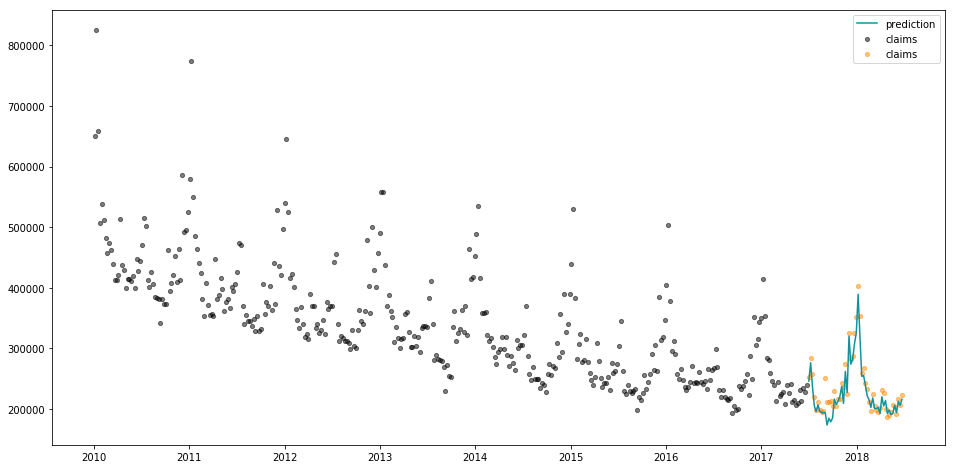

In [36]:
plot_predicted_data(training_actual_df=train_df, predicted_df=predicted_df, 
                    date_col=dlt_mean.date_col, actual_col=dlt_mean.response_col, pred_col='prediction', 
                    test_actual_df=test_df)

## MAP Fit and Decomp with Regression

In [37]:
dlt_reg=DLT(
    response_col='claims',
    regressor_col=['trend.unemploy', 'trend.filling'],
    date_col='week',
    seasonality=52,
    seed=8888,
    predict_method='map'
)

In [38]:
dlt_reg.fit(df=train_df)

In [39]:
predicted_df = dlt_reg.predict(df=test_df, decompose=True)

In [40]:
predicted_df.head(5)

,week,prediction,trend,seasonality,regression
0,2017-07-02,281269.192644,227181.848403,1.063335,1.164336
1,2017-07-09,315485.862201,226704.978341,1.200937,1.158774
2,2017-07-16,268835.900196,226228.477373,1.025886,1.158353
3,2017-07-23,231675.837360,225752.410438,0.889704,1.153461
4,2017-07-30,223017.375898,225276.835645,0.856053,1.156436
